## 1. Load Dataset from Kaggle

This section uses `kagglehub` to download the Credit Card Fraud Detection dataset from Kaggle.


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Path to dataset files: /Users/vladromaniuk/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3


## 2. Load and Explore the Dataset

Load the dataset into a DataFrame and check for missing values and basic structure.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Путь к файлу
file_path = "/Users/vladromaniuk/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3/creditcard.csv"

# Загрузка в DataFrame
df = pd.read_csv(file_path)

# Посмотреть первые 5 строк
print(df.head())

# Проверка базовой информации
print(df.info())

# Проверка, есть ли пропущенные значения
print(df.isnull().sum())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

## 3. Class Distribution

Check the balance between fraud (1) and non-fraud (0) transactions.


In [3]:
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 5. Train-Test Split + Feature-Target separation


In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=8)


## 6. Pipeline creation: scaling + XGBoost model + imports

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    average_precision_score,
    precision_recall_curve,
    auc
)

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", XGBClassifier(
        scale_pos_weight=((len(y_train) - sum(y_train)) / sum(y_train)), # automatic balance 
        use_label_encoder = False,
        eval_metric = 'auc',
        n_jobs = -1,
        random_state = 8, 
    )),
])

## 7. Train the Model


In [7]:
pipeline.fit(X_train, y_train)

/Users/vladromaniuk/Desktop/Card fraud detection /venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:18:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='auc',
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=-1,
                               num_parallel_tree=None, ...))])

## 8. Predictions & Basic Evaluation


In [8]:
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.88      0.90        98

    accuracy                           1.00     56962
   macro avg       0.96      0.94      0.95     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC: 0.9827459789486983


## 9. Detailed Metrics


In [9]:
print("=== Basic Metrics ===")
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred)))
print("F1 Score: {:.4f}".format(f1_score(y_test, y_pred)))
print("ROC AUC: {:.4f}".format(roc_auc_score(y_test, y_proba)))
print("Average Precision (PR AUC): {:.4f}".format(average_precision_score(y_test, y_proba)))

=== Basic Metrics ===
Accuracy: 0.9997
Precision: 0.9247
Recall: 0.8776
F1 Score: 0.9005
ROC AUC: 0.9827
Average Precision (PR AUC): 0.8625


## 10. Confusion Matrix


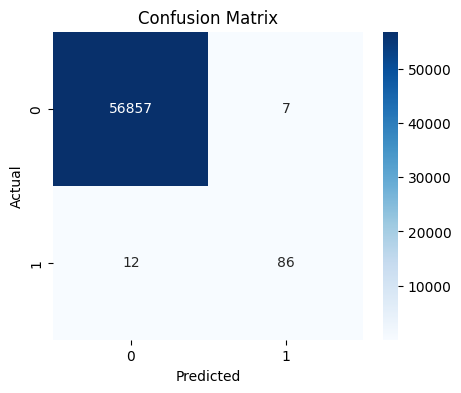

In [10]:
# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## 11. Precision-Recall Curve


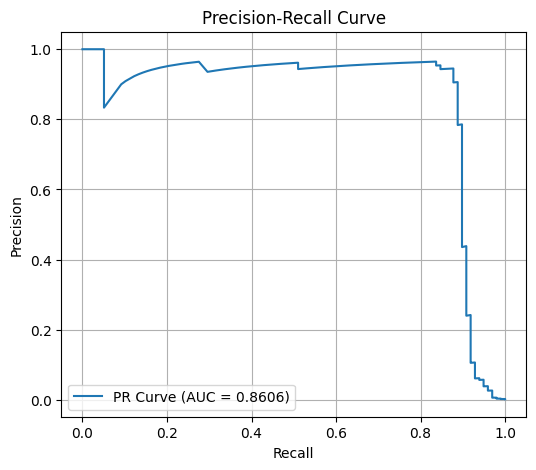

In [11]:
# 3. Precision-Recall крива
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.4f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()